# Basics of Artificial Neural Network

> Harsh Shah, E-mail: harsh.shah@thep.lu.se

> Department of Astronomy and Theoretical Physics, Lund University

## Introduction
For complex and repetative tasks advanced and swift computational technology is been used. Artificial neural network (**ANN**) is such data analysis technique. ANN is widely used in many research and technology fields. Voice recognition, image identification, language translation are few examples where ANN is employed. ANN is a parallel computational technique inspired from analogy of [biological neurons](https://en.wikipedia.org/wiki/Neuron) inside brain. This implies that ANN is simplified name of a large set of interlinked processing units, named as nodes or neurons. These nodes receive weighted information about input and process those weights to learn different features of the incoming signal and generate output. The regime of computation where ANN is used for data analysis is also known as machine learning.


The basic idea of ANN is to provide a training data-set to the network to learn various aspects of the data-set. Once the network is trained its been validated against a test data-set where network tries to predict the output. Based upon the true prediction efficiency performance of the network can be obtained. **Supervised** and **unsupervised** are two major categories of machine learning. In supervised learning network is trained over a set of training data set and then its been tested against validation data. While in unsupervised technique, network is provided a data-set and meant to learn different features of the data by itself. Depending upon tasks in hand ANN can be classified in two categories.

Category | Techniques |  Examples
-------- | -------- | ----------
Feed-forward network | MLP, regression | Classifications problems
Recurcive network | CNN,RNN | Image recognization, sequence identification

Simplified illustration of how ANN works can be seen as below:
![](perceptron_node.png)
<p align="center"> Figure : Cartoon outline of ANN network strucuture </p>

Hence, net input can be calculated as

##### $$
\sum\limits_{i=0}^{m} x_{i}* w_{i} = y_{i}
$$

The output is resultant of activation function applied on net input
##### $$
Y = F(y_i)
$$

Nodes act on weighted input and generate an output signal. The wight can be positive or negative depending upon input. There is also a biased input node independent of the inputs. It can be seen as input node marked as **1** in the figure above. This bias node multiplied with its weight used as a constant term. The function F(y) is called activation function. There are various types of activation functions.

* Linear : F(y) = y
* Threshold : F(y) = 0 y < 0; F(y) = 1 if y > 0
* Logistic : F(y) = $\frac{1}{1 + \exp^{-y}}$
* Hyperbolic : F(y) = $\tanh(y)$

In general every type of ANN has three main set of building blocks:
1. Network Topology
2. Weights and learning rate
3. Activation Function

### Network Topology
Based upon flow of weights in the network, topology classified into two categories. Feed forward networks, where flow of weights is unidirectional and towards output. The another type is feed back networks. Here weights can be feed to previous layer of nodes or to the node itself. The network with more than one layer of nodes also considered as multi-layer ANN. It's not compulsory to connect all the nodes, some nodes can be skipped and a probability function can also be assigned for node skipping.
![](feed-forward.png)
$$ Figure : Feed-forward network $$
![](rnn.gif)
$$ Figure : Feed-back network $$

### Adjusting weights or learning rate
In supervised learning for each produced output difference between true value and network predicted output is considered as an error, if it's away from 0. These errors are then used to modify weight vectors.

Learning rate of the network will define difference between two weight selections. Large value of learning rate allows network to chose more random values of consecutive weights. Smaller value restricts randomness in weigh selection. For larger value network training would be fast compared to smaller learning rate. But then it may be a probability that network may not find an optimal minimum of error function and efficiency would be low. On the other hand if learning rate is too small, network may end up into some local minimum and could not reach to global minimum of the error function. Hence, to improve network precision one has to choose an optimum value for learning rate.

In the case of unsupervised learning network doesn't have any comparision to match with regarding generated output. Hence, in this type of ANNs network has to learn patterns and sequences by itself and modify its output signals.


### Activation Fuction
Activation functions are a mean to generate specific outputs. From the above mentioned examples of activation function one can see that activation functions bounds the output signals within certain range. Based upon this, network distinguishes various outputs and perform assigned tasks. There could be more than one activation functions in a network. One can set different activation function for different layers of the network.


There are various types of error minimization functions just like there is variety in activation functions. 
In the network training, there is always a catch of over training. There could be multiple models of ANN to solve problems in hand. A network is considered as good network if validation error is lower then training error. Though it may not be always true. If network produces very small training error, but large validation error then such network is considered as over trained network.


I haven't discussed mathematical details of error minimization, more advanced nodes like [LSTM](https://en.wikipedia.org/wiki/Long_short-term_memory) and much complex networks like [deep learning](https://en.wikipedia.org/wiki/Deep_learning). The field of ANN is huge and will become intrinsic part of our future day to day life and scientific research as _atificial intelligence_. 

With this very basics overview of ANN, below I will discuss two examples to show how ANN can be trained and what are the various parameters.

Example 1 : In this example feed-forward network is trained to distinguish two classes of data. The data used here is Pima Indians dataset. There are two files one is used for training the network and another is used to validate network efficiency. The data set consists of 8 different parameters about patients and a definite output regarding whether patient is diabetic or not. Network will be trained over a set of data set where network will learn to distinguish diabetic and non diabetic patients. Then network is feed with unknown data set and it will predict the decease based upon given data set.

Example 2: This example is of a more advanced network training named as Convolutional Neural Network([CNN](http://cs231n.github.io/convolutional-networks/)). In this example I have shown how various layers of the nodes learns about different specifications of given image. Here, I have used [MNIST](http://yann.lecun.com/exdb/mnist/) data set. I used a small set of data-set consists of hand written number 2 and number 3. The motto of this example is to get feeling about how different nodes in different layers try to learn different features of given input in this case of number 2 and 3. CNN is widely used for image recognition techniques. For fun with such technique please visit [fun](https://visual-recognition-demo.ng.bluemix.net/).

Apart from usual libraries, to reproduce examples below user requires to install **keras**. [Keras](https://keras.io/) is a very efficient and widely used library for data analysis with machine learning. There are various sub libraries and functions within keras which called directly to be used as activation functions and error minimization functions.

## Example 1
The cell below is import. In this cell I have defined all the libraries which are used in both of the examples.


In [23]:
import numpy as np
import scipy as sp
import tensorflow as tf
import time

import keras
from keras import metrics, regularizers
from keras import backend as K
from keras.layers import Activation, Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Lambda, concatenate
#from keras.layers import LSTM, GRU, SimpleRNN

from keras.models import Model, Sequential
from keras.optimizers import SGD, Adam, RMSprop, Nadam

#from sklearn.metrics import *

import matplotlib.pyplot as plt
import matplotlib as mpl

#from tensorflow.python.client import device_lib

# The size of the plots.
mpl.rcParams['figure.figsize'] = (5,5)

%matplotlib inline


In the cell below a generalised model is defined with few default functions.

In [24]:
def pipline(inp_dim,
            n_nod,
            act_fun = 'relu',
            out_act_fun = 'sigmoid',
            opt_method = 'Adam',
            cost_fun = 'binary_crossentropy',
            lr_rate = 0.01, 
            lambd = 0.0):
    
    lays = [inp_dim] + n_nod
    
    main_input = Input(shape=(inp_dim,), dtype='float32', name='main_input')
    
    X = main_input
    for nod in n_nod:
        X = Dense(nod, 
                  activation = act_fun,
                  kernel_regularizer=regularizers.l2(lambd))(X)
        
    output = Dense(1, activation = out_act_fun )(X)
    
    method = getattr(keras.optimizers, opt_method)
    
    model =  Model(inputs=[main_input], outputs=[output])
    model.compile(optimizer = method(lr = lr_rate),
                  loss = cost_fun)   
    
    return model

Here, below the statistics of network performance is been calculated. Since, we want binary output, classification boundary is chosen as 0.5. Output signal value above 0.5 will be considered as one class and below 0.5 will define another class.

In [25]:
def stats_class(x = None, y = None, label = 'Training', modl = None):
    """
    input :  
             x = input
             y = output
             label = "Provided text string"
             modl = the model
             
    output : 
             sensitivity = fraction of correctly classified positive cases
             specificity = fraction of correctly classified negative cases
             accuracy = fraction of correctly classified cases
             loss = typically the cross-entropy error
    """
    
    def binary(y1):
        y1[y1>.5] = 1.
        y1[y1<= .5] = 0.        
        return y1

    y_pr = modl.predict(x, batch_size = x.shape[0], verbose=0).reshape(y.shape)
                
    nof_p, tp, nof_n, tn = [np.count_nonzero(k) for k in [y==1, y_pr[y==1.] > 0.5, y==0, y_pr[y==0.]<= 0.5]]
    
    sens = tp / nof_p
    spec = tn / nof_n
    acc = (tp + tn) / (len(y))
    loss = modl.evaluate(x, y , batch_size =  x.shape[0], verbose=0)
                
    A = ['Accuracy', 'Sensitivity', 'Specificity', 'Loss']
    B = [acc, sens, spec, loss]
    
    print('\n#############  STATISTICS for {} Data ##############\n'.format(label))
    for r in zip(A,B):
         print(*r, sep = '   ')
    return print('\n#########################################################\n')  


Please make sure of **pima-trn.csv** and **pima-val.csv** files are in the same directory as of this note-book.


User can change following parameters in the **INPUT** section and re-run the cell and can observe their effects on accuracy and loss of the network's training and validation:
1. n_nod: size of the network, eg [5] for a one hidden layer with 5 nodes and [5,3] for a two layer network with 5 and 3 hidden nodes each.
2. act_fun: the activation function.
    * 'linear'
    * 'relu'
    * 'tanh'
    * 'sigmoid'
        
3. out_act_fun: the activation function for the output nodes.
    * 'linear'
    * 'sigmoid'
    * 'softmax'
    
4. opt_method: The error minimization method.
    * 'SGD'
    * 'Adam'
    * 'Nadam'
    * 'RMSprop'
    
5. cost_fun: The error function used during training.
    * 'mean_squared_error' as mse
    * 'binary_crossentropy'

6. lr_rate: The learning rate. Note some of the minimization methods uses a dynamical learning rate. In such a cases this value sets the initial learning rate.


 training data shape:  (538, 8) 
 testing data shape:  (230, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 8)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 14)                126       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 15        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________

#############  STATISTICS for Training Data ##############

Accuracy   0.7713754646840149
Sensitivity   0.5159574468085106
Specificity   0.9085714285714286
Loss   0.167439073324

#########################################################


#############  STATISTICS for Validation Data ##############

Accuracy   0.7782608695652173
Sensitivity

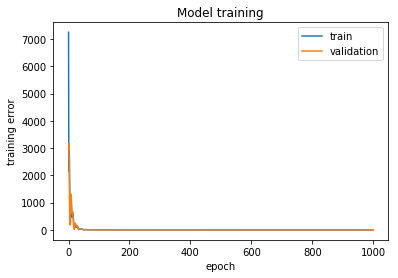

CPU times: user 2.6 s, sys: 72 ms, total: 2.67 s
Wall time: 1.94 s


In [26]:
%%time

pima_t = np.loadtxt("pima-trn.csv", skiprows= 1, 
                    usecols = tuple(np.arange(1,10)) ).astype("float32")
pima_v = np.loadtxt("pima-val.csv", skiprows= 1,
                    usecols = tuple(np.arange(1,10)) ).astype("float32")


x_train, d_train = pima_t[:,:8], pima_t[:,-1]
x_val, d_val = pima_v[:,:8], pima_v[:,-1]

print('\n training data shape: ', x_train.shape, '\n testing data shape: ',x_val.shape)

# Define the network, cost function and minimization method
INPUT = {'inp_dim': x_train.shape[1],         
         'n_nod': [14],                      # number of nodes in hidden layer
         'act_fun': 'linear',                 # activation functions for the hidden layer
         'out_act_fun': 'linear',          # output activation function
         'opt_method': 'adam',               # minimization method
         'cost_fun': 'mse', # error function
         'lr_rate': 0.03                    # learningrate
        }
       
# Get the model
model = pipline(**INPUT)

# Print a summary of the model
model.summary()

# Train the model
estimator = model.fit(x_train, d_train,
                      epochs = 1000,      # Number of epochs
                      validation_data=(x_val, d_val),
                      batch_size = x_train.shape[0],   # Batch size = all data (batch learning)
                      #batch_size=132,                    # Batch size for true SGD
                      verbose = 0)

##############################################################################
# Call the stats function to print out statistics for classification problems
stats_class(x_train, d_train, 'Training', model)
stats_class(x_val, d_val, 'Validation', model)

# Plot the learning curves
plt.plot(estimator.history['loss'])
plt.plot(estimator.history['val_loss'])
plt.title('Model training')
plt.ylabel('training error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)
plt.show()

### Example 2

Make sure you have **mnist.npy** file and this notebook in the same directory.

In [27]:
def loadMNIST():
    xtrain, ytrain, xtest, ytest = np.load("mnist.npy")
    width, height = xtrain.shape[1:3]
    return xtrain, ytrain, xtest, ytest, width, height

In [28]:
def binary_pred_stats(ytrue, ypred, threshold=0.5):
    one_correct = np.sum((ytrue==1)*(ypred > threshold))
    zero_correct = np.sum((ytrue==0)*(ypred <= threshold))
    sensitivity = one_correct / np.sum(ytrue==1)
    specificity = zero_correct / np.sum(ytrue==0)
    accuracy = (one_correct + zero_correct) / len(ytrue)
    return sensitivity, specificity, accuracy

In the cell below CNN model is been trained over MNIST data set.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 2)         56        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 2)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 6         
__________

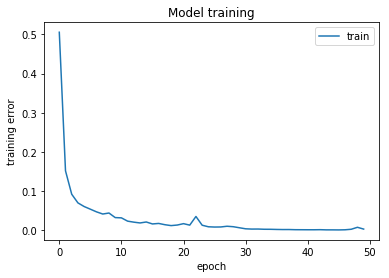

train set: 1.0 0.999 0.9995
test set:  0.991089108911 0.982558139535 0.986777668952


In [29]:
# To load parts of the MNIST database
xtrain, ytrain, xtest, ytest, width, height = loadMNIST()

# The size of the images
input_shape = (width, height, 1)

"""
conv2D (a,b,c)
    a = number of hidden nodes
    b = size of matrix (usually n X n)
    c = type of activation function e.g. relu, sigmoid, linear etc.
    
MaxPooling2D (d)
    d = size of maxpooling matrix (usually 2 X 2)
"""

# Define the CNN model
model = Sequential([
    Conv2D(3, kernel_size=(3, 3),
           activation='relu',input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(2, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
   # Conv2D(2, kernel_size=(3, 3), activation='relu'),
   # MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(5, activation='relu'),
    #Dropout(0.5),
    Dense(1),
    Activation('sigmoid')
])

# We use cross entropy error and the adam optimizer
adam = Adam(lr=0.005)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()


# Now train the model
estimator = model.fit(xtrain, ytrain, 
                      epochs=50, 
                      batch_size=50,
                      verbose=0)

# Plot the training error
plt.plot(estimator.history['loss'])
plt.title('Model training')
plt.ylabel('training error')
plt.xlabel('epoch')
plt.legend(['train'], loc=0)
plt.show()

# Get the training predictions and results for those
predtrain = model.predict(xtrain)[:,0]
sensitivity, specificity, accuracy = binary_pred_stats(ytrain, predtrain)
print("train set:", sensitivity, specificity, accuracy)

# Get the test predictions and the results for those
predtest = model.predict(xtest)[:,0]
sensitivity, specificity, accuracy = binary_pred_stats(ytest, predtest)
print("test set: ", sensitivity, specificity, accuracy)


We trained our network in the cell above. By running cell below output will show what different convolution nodes in each layer sees from the input. If user runs the cell multiple times, he/she can observe that position of nodes fetching different features of the input varies randomly. It is just to get feeling of how different nodes learn about various properties of the input. For more detailed understanding user is suggested to follow hyper-link of **CNN**.

1.0


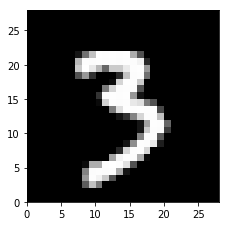

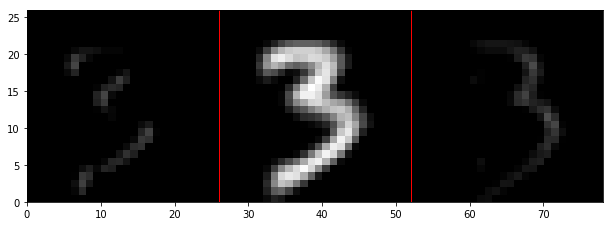

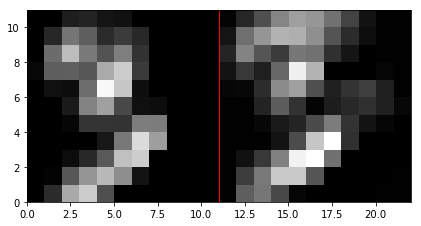

In [30]:
# if True then Maxpooling will be applied before showing the filter
post_pool = False
#post_pool = True

# The image index to show
#idx = 8 # number 2
#idx = 11 # number 3
idx = 2 # number 3
#idx = 21 # number 2

kind = MaxPooling2D if post_pool else Conv2D
outs = [model.layers[0].input] + [l.output for l in model.layers if isinstance(l, kind)]
intermediate = K.function([model.layers[0].input, K.learning_phase()], outs)
print(ytest[idx])
states = intermediate([xtest[idx:idx+1], 0])
plt.figure(figsize=(18,12))                    
for k,s in enumerate(states):
    plt.figure(figsize=(18,12))
    plt.subplot(len(outs),1,k+1)
    pics = s[0]
    pics = np.rollaxis(pics,2,0)
    rows = 2 if pics.shape[0] > 8 else 1
    cols = pics.shape[0]//rows
    imgshape = pics.shape[1:]
    pics = pics.reshape((rows,cols)+imgshape)
    pics = pics.swapaxes(1,2)
    pics = pics.reshape((pics.shape[0]*pics.shape[1], pics.shape[2]*pics.shape[3]))
    extent = (0,cols*imgshape[0], 0,rows*imgshape[1])
    plt.imshow(pics,cmap='gray',extent=extent)
    for r in range(1,rows):
        plt.plot([0,cols*imgshape[0]], [r*imgshape[1], r*imgshape[1]], color='r', linestyle='-', linewidth=1)
    for c in range(1,cols):
        plt.plot([c*imgshape[0], c*imgshape[0]], [0,rows*imgshape[1]], color='r', linestyle='-', linewidth=1)

### References
* Text and examples are inspired from ANN course of department of theoretical physics, Lund University

### Further Reading and useful websites
* Various web-links are set in the notebook whenever a new term is introduced